# Métodos Numéricos (Mayo 2023)

## Guía 4: Derivadas

In [10]:
using Plots
using LaTeXStrings

## Problema 1


Defina una función, que, dada una función, un punto y un intervalo, retorne una aproximación a la derivada de la función dada, evaluada en el punto dado, utilizando la fórmula de diferencias finitas que se deriva de la siguiente aproximación (*fórmula centrada de tres puntos*): 


$$
f^\prime(x) = \frac{f(x+h) - f(x-h)}{2h} + \mathcal{O}(h^2)
$$

Utilize dicha función para evaluar la derivada de la función $f(x) = x e^x$ en el punto $x=2$
para distintos valores de $h$ y calcule el incremento óptimo $h_o$ teniendo en cuenta los errores de truncamiento y redondeo. 
Usando la diferencia entre $f'(2)$ (calculado en Julia usando las funciones matemáticas incorporadas) y el valor de la aproximación mencionada, grafique en escala *log-log* el error versus $h$ para $h = 10^{-k}$ con $k$ entero.

In [3]:
function dif_3(f::Function,
    h::Float64,
    x::Float64)
    
    df = (f(x+h) - f(x-h)) / (2*h)
    return df
end
        

dif_3 (generic function with 1 method)

In [4]:
f(x) = x*exp(x)
df_2(h) = dif_3(f,h,2.0)

df_2 (generic function with 1 method)

In [5]:
df(x) = (x+1)*exp(x)
valf2 = df(2)
g64(h) = df_2(h) - valf2

g64 (generic function with 1 method)

In [6]:
# Funcion en 32
g32(h)=(Float32(f(2.0+h))-Float32(f(2.0-h)))/Float32(2h) - Float32(valf2)
# Funcion en bigFloat
gBF(h)=(BigFloat(f(2.0+h))-BigFloat(f(2.0-h)))/BigFloat(2h) - BigFloat(valf2)


gBF (generic function with 1 method)

In [9]:
n = 20
h = [10.0^(-i) for i in 1:n] ;

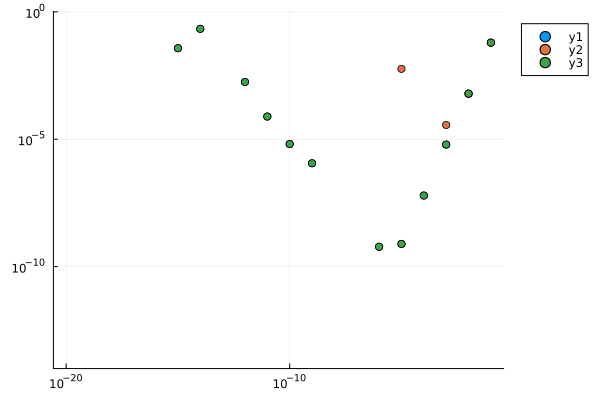

┌ Warning: Invalid negative or zero value -1.8050293704163778e-8 found at series index 7 for log10 based yscale
└ @ Plots ~/.julia/packages/Plots/tDHxD/src/utils.jl:106


In [13]:
scatter(h,g64.(h), legend=:outertopright, lw=3,
xaxis=:log,
yaxis=:log,
ylims = (10e-15, 0)
)
scatter!(h,g32.(h))
scatter!(h,gBF.(h), lw=1)

## Problema 2

Para funciones $f(x)$ que son suficientemente diferenciables en $x=c$

1. Muestre que se  puede aproximar $f'(c)$ con la *fórmula centrada de 5 puntos*
$$
D_5f(c) := \,\frac{1}{12 h} \left(f(c-2 h)-8 f(c-h)+8 f(c+h)-f(c+2 h)
\right)
$$


2. Muestre que la aproximación es exacta para polinomios de grado $\le 4$.
*Ayuda:* calcule explícitamente el término expresado como $O(h^4)$ en la ecuación siguiente, usando una expansión en serie de Taylor alrededor de $x=c$ de todas las evaluaciones de la función que aparecen en la fórmula para $D_5f(c)$.

$$
f'(c)\,=\,\frac{1}{12 h} \left(f(c-2 h)-8 f(c-h)+8 f(c+h)-f(c+2 h)
\right)\,+\,O(h^4)
$$

In [14]:
# Defino las funciones para calcular las derivadas:
function dif_5_medio(f::Function,
    h::Float64,
    x::Float64
    )
    df = (f(x-2h)-8f(x-h)+8f(x+h)-f(x+2h))/12h
    return df
end

dif_5_medio (generic function with 1 method)

## Problema 3

1. Implemente el cálculo aproximado de las derivadas de una función arbitraria utilizando las fórmulas *i) hacia adelante de 2 puntos*, *ii) centrada de 3 puntos* y *iii) centrada de 5 puntos*.

2. Aplíquelas para obtener los valores aproximados de las derivadas de $f(x)=\cos x$ y $g(x)=e^x$.

3. Haga un gráfico *log-log* del error relativo $E$ vs $h$ para $h\in [\epsilon_m(x),0.1]$ y $x=0.1, 1, 100$. Aquí $\epsilon_m(x)$ es la precisión de la máquina al valor $x$.

4. Verifique si el número de cifras decimales que obtiene coincide con las estimaciones presentadas en el téorico.

5. Identifique las regiones donde domina el error del algoritmo y el error de redondeo, respectivamente. Las pendientes que se observan, corresponden a las predichas en el teórico?

In [15]:
function dif_2_adelante(f::Function,
    h::Float64,
    x::Float64
    )
    df = (f(x+h)-f(x))/h
    return df
end

dif_2_adelante (generic function with 1 method)

In [ ]:
f(x) = cos(x)
df(x) = -sin(x)
g(x) = exp(x)
# Valores de f'(x) por los metodos
println("Metodos: ",dif_5_medio(f,0.1,0.1),"   ",dif_5_medio(f,0.1,1.0),"    ",dif_5_medio(f,0.1,100.0))
# valores de f'(x) teoricos calculados
println("Teorico: ",df(0.1),"   ",df(1),"   ",df(100))
# Valores de g'(x) por los metodos
println("Metodos: ",dif_5_medio(g,0.1,0.1),"    ",dif_5_medio(g,0.1,1.0),"    ",dif_5_medio(g,0.1,100.0))
# valores de f'(x) teoricos calculados
println("Teorico: ",g(0.1),"   ",g(1),"   ",g(100))

## Problema 4

En el archivo `pos.dat` que se encuentra en el repositorio se dispone de un conjunto de datos experimentales de la posición de un móvil que se desplaza en línea recta. El mismo tiene dos columnas, siendo la primera el tiempo de la medición, $t_i$ y la segunda la posición, $x(t_i)$.

1. Escriba un programa que lea los datos del archivo y calcule la velocidad del móvil para los mismos tiempos, $t_i$. Utilice la fórmula de 3 puntos. Preste especial atención a los puntos de los bordes del intervalo.
2. Repita el punto 1. utilizando las fórmulas de 5 puntos.

**Ayuda:** Para bajar el archivo `pos.dat` del repositorio de github desde julia realice:

In [16]:
# Ejemplo de como bajar un archivo.
separador = "/" # En Linux
#separador = "\" # En Windows
download(
    "https://raw.githubusercontent.com/reula/Metodos_Numericos_2022/main/Guias/pos.dat", # Bajamos el archivo pos.dat del repositorio en el que están las guías.
    pwd() * separador * "pos.dat" # Guardamos lo bajado en un archivo llamado pos.dat en el directorio local.
)

┌ Error: curl_easy_setopt: 48
└ @ Downloads.Curl /builddir/build/BUILD/julia-1.8.0/build/usr/share/julia/stdlib/v1.8/Downloads/src/Curl/utils.jl:29
┌ Error: curl_easy_setopt: 48
└ @ Downloads.Curl /builddir/build/BUILD/julia-1.8.0/build/usr/share/julia/stdlib/v1.8/Downloads/src/Curl/utils.jl:29
┌ Error: curl_easy_setopt: 48
└ @ Downloads.Curl /builddir/build/BUILD/julia-1.8.0/build/usr/share/julia/stdlib/v1.8/Downloads/src/Curl/utils.jl:29


"/home/santiago/FAMAF/2do/Fork_metodos-numericos-2023/guias/pos.dat"

1. **Notar que Windows usa `"\"` en vez de `"/"`.**

2. Cuando entre a github a ver los links a los archivos, seleccione primero el archivo, cuando se visualice selecione el botón **Raw**. Fíjese que el link debe comenzar con https://raw.githubusercontent.com

**Ayuda:** Para cargar los datos en `pos.dat` a vectores de Julia utilice:

In [17]:
t = Vector{Float64}()
x = Vector{Float64}()
open("pos.dat","r") do fh
    for line in readlines(fh) 
        cols = split(line)
        push!(t,parse(Float64,cols[1]))
        push!(x,parse(Float64,cols[2]))
    end
end

# Ejercicios Complementarios

## Problema C.1

**Derivada segunda:** Deduzca la fórmula centrada equiespaciada de tres puntos para la derivada segunda $f''(x_0)$. Incluya una cota para el error absoluto.

## Problema C.2

**Interpolación y diferenciación:** Se conoce el valor de $f(x)$ en tres puntos $x_0,x_1,x_2$. Escriba el polinomio interpolante $P_2(x)$ en la forma de Lagrange. Asuma que aproximamos $f'(x_i)$ por $P_2'(x_i)$,

1. Muestre que si tomamos $x_0=c-h,\,x_1=c,\,x_2=c+h$ obtenemos la expresión del algoritmo centrado de tres
puntos para $f'(c)$. 
2. Muestre que, en general, esta proximación arroja el algoritmo de tres puntos. Reobtenga la fórmula dada en el teórico para $x_0=c-h_1,\,x_1=c,\,x_2=c+h_2$. Obtenga una expresión para las derivadas en extremos del intervalo $[a,b]$, $f'(a)$ con $x_0=a,\,x_1=a+h,\,x_2=a+2 h$ y $f'(b)$ con $x_0=b,\,x_1=b-h,\,x_2=b-2h$.
3. Generalice a 5 puntos y re-obtenga el algoritmo centrado y equiespaciado en este caso.